In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

From equation 3.2 of *Monteo Carlo Methods in Financial Engineering* if $\{ W(t), 0 \leq t \leq T\}$ is a Brownian motion process then if $t_0 = 0$ and $W(0) = 0$ then we have
$$
W(t_{i+1}) = W(t_i) + \sqrt{t_{i+1} - t_i} Z_{i+1}
$$
where the $Z_i$ are independent standard normal random variables.

In [2]:
mu, sigma = 0.0, 1.0

In [3]:
paths = 10

steps = 1000

In [4]:
W = np.zeros((paths, steps))

In [5]:
Z = np.random.normal(mu, sigma, (paths, steps))

In [6]:
interval = [0.0, 1.0]

dt = (interval[1] - interval[0]) / (steps - 1)

In [7]:
t_axis = np.linspace(interval[0], interval[1], steps)

In [8]:
for i in range(1, steps):
    W[:, i] = W[:,i-1] + np.sqrt(dt) * Z[:, i]

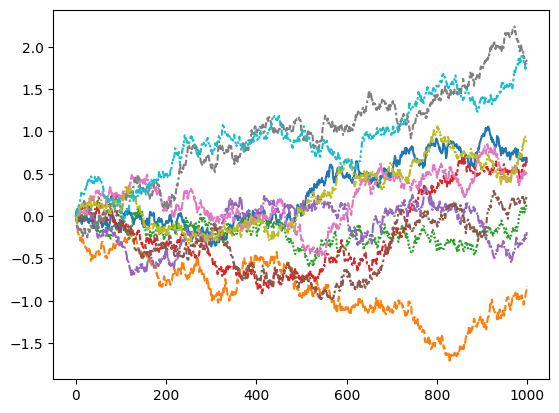

In [9]:
df = pd.DataFrame(W).T

df.set_index(t_axis)

sns.lineplot(data=df)
plt.legend([],[], frameon=False)



<Axes: ylabel='Density'>

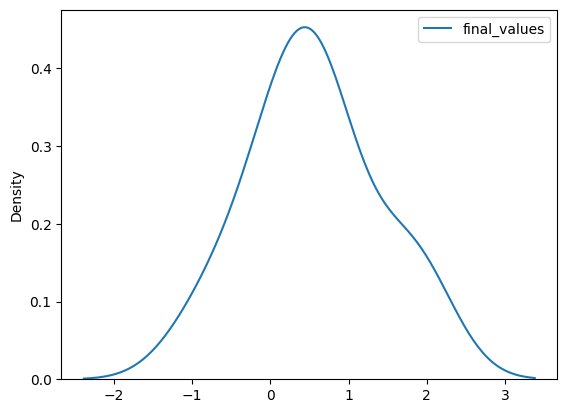

In [10]:
final_values = pd.DataFrame({'final_values': W[:, -1]})
sns.kdeplot(final_values)

# Nonstandard brownian motion

Equation 3.3 is a generalized version of equation 3.2, allowing for a different drift and diffusion constant. In particular,
$$
X(t_{i+1}) = X_(t_i) + \mu(t_{i+1} - t_i) + \sigma \sqrt{t_{i+1} - t_i} Z_{i+1}
$$

In [11]:
mu, sigma = 5.0, 1.5

In [12]:
X = np.zeros((paths, steps))

for i in range(1, steps):
    X[:, i] = X[:,i-1] + mu * dt + sigma * np.sqrt(dt) * Z[:, i]

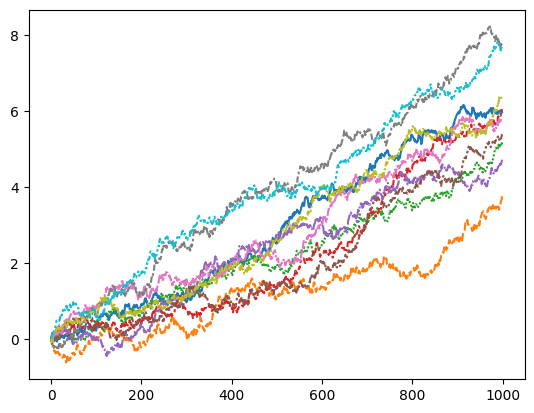

In [13]:
df = pd.DataFrame(X).T

df.set_index(t_axis)

sns.lineplot(data=df)
plt.legend([],[], frameon=False)



<Axes: ylabel='Density'>

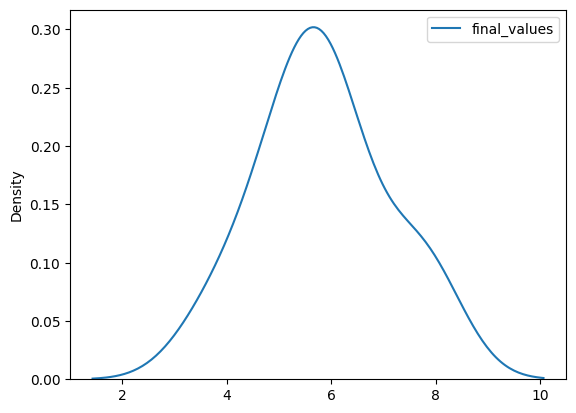

In [14]:
final_values = pd.DataFrame({'final_values': X[:, -1]})
sns.kdeplot(final_values)

In [15]:
final_values.describe()

,final_values
count,10.000000
mean,5.838890
std,1.231067
min,3.759578
25%,5.186755
50%,5.849799
75%,6.203458
max,7.735917


# Geometric Brownian motion

In geometric brownian motion, the $t$th value is given by
$$
S(t) = S(0) \exp\left( (\mu - \frac{1}{2} \sigma^2  ) + \sigma B(t) \right)
$$

In [56]:
paths = 2
steps = 100
s0 = 100.0

# stolen from tutorial
dt = 1 / steps

St = np.exp(
    (mu - 0.5 * sigma**2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(paths, steps)).T
)

St = np.vstack([np.ones(paths), St])

St = s0 * St.cumprod(axis=0)

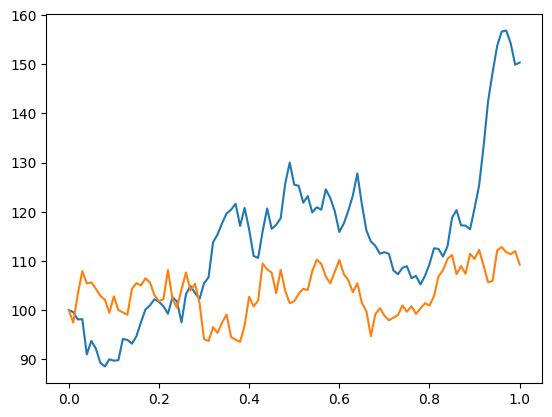

In [57]:
time = np.linspace(0, 1, steps+1)

tt = np.full(shape=(paths, steps+1), fill_value=time).T

plt.plot(tt, St)